# <center>How To Win Udemy</center>

### Sources and credits for this project

- https://www.kaggle.com/andrewmvd/udemy-courses
- Dataset author: Willden Chase from Concept Center.
- Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.


## Introduction and Goal definition

This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.
Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.
This version modifies column names, removes empty columns and aggregates everything into a single csv file for ease of use.

We can draw immidietly some obvious questions realated to the topic like:
- What are the best free courses by subject?
- What are the most popular courses?
- What are the most engaging courses?
- How are courses related?
- Which courses offer the best cost benefit?

While those questions are defentliy worth exploring as details, I more intrested in exploring the question that wraps them all - what makes a course successful? or in other words, how to win Udemy?

In [2]:
# add - how im I going to answer that question?

### Workflow stages

1. Prepare and clean the data for work. 
2. Analyze, identify patterns, and explore the data.
3. Division of the records into a training group and a test group.
4. Models training and evaluation.

## 1) Prepare and clean the data for work

In [18]:
# some basic imports that will surely be useful
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read data
data = pd.read_csv('data/udemy_courses.csv')
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Attributes explanation:

- course_id: Unique Ids for course identification.
- course_title: The name of the course.
- url: Course page url.
- is_paid: Paid course or not.
- price: The price of enrolling to the course.
- num_subscribers: The number of people who enrolled to the course already.
- num_reviews: Number of reviews.
- num_lectures: Number of lectures in the course.
- level: What level of prior student knowledge does this course require.
- content_duration: How long in sum is the course lectures.
- published_timestamp: When was the course first published.
- subject: The area of knowledge this course is in.

### Basic Exploratory Of The Data - Quick Look at the Data Structure

We want to check for unneccecery and problamatic columns that might need removal or normalization.

Let's take a basic look about the columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


The data is clean from null values, and is conducted from numerical, boolean and object values.

So the columns that can be the most problematic for us are the ones whith Object values:

- course_title: Non-categorial but might have some reccuring patterns that can help us.
- url: Non-categorial and completely individual so not useful in any way.
- level: Categorial.
- published_timestamp: Non-categorial, but might have some reccuring patterns that can help us.
- subject: Categorial.

In [6]:
data['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [7]:
data['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

We can see that our dataset indeeed contains only the four subject we talked about in the intro, and also we can see that there only four levels of courses with most of them are fitted to all levels / beginners.

In [8]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
# we cannot histogram the is_paid column so we can already conver it to binary values.
data["is_paid"] = data["is_paid"].astype(int)

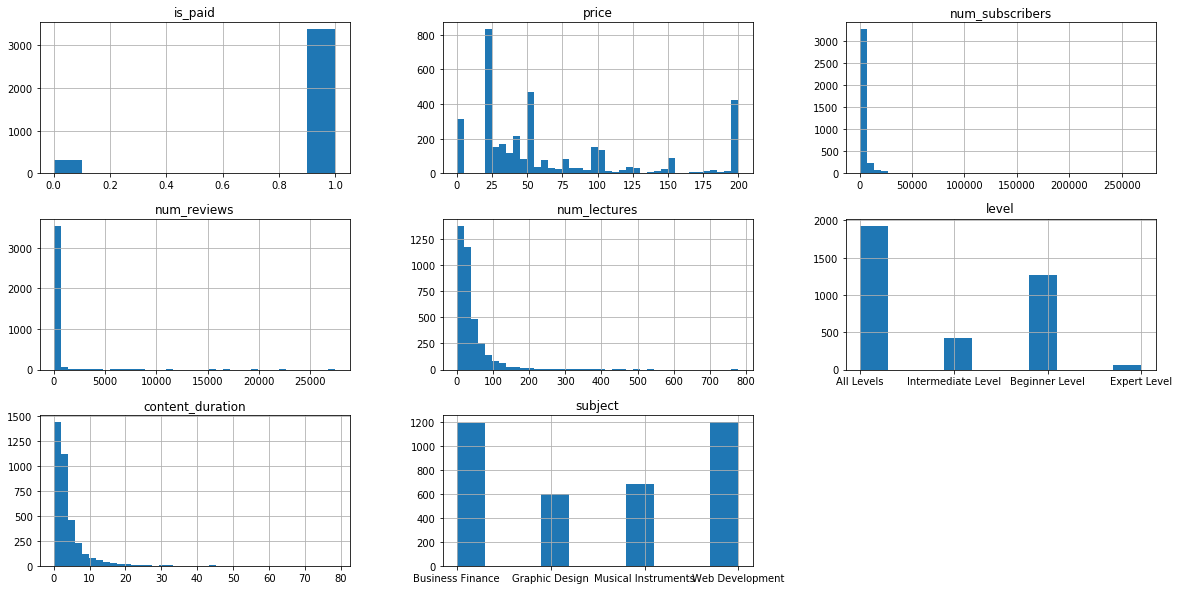

In [10]:
# and for categorial attributes
fig, axs = plt.subplots(3, 3, figsize=(20,10))

data.hist(bins=10, ax=axs[0,0], column='is_paid')
data.hist(bins=40, ax=axs[0,1], column='price')
data.hist(bins=40, ax=axs[0,2], column='num_subscribers')
data.hist(bins=40, ax=axs[1,0], column='num_reviews')
data.hist(bins=40, ax=axs[1,1], column='num_lectures')
data['level'].hist(bins=10, ax=axs[1,2])
axs[1, 2].set_title('level')
data.hist(bins=40, ax=axs[2,0], column='content_duration')
data['subject'].hist(bins=10, ax=axs[2,1])
axs[2, 1].set_title('subject')

fig.delaxes(axs[2, 2])

Describing the data starts reavilling more intresting insights about the numerical features but we will go deeper on that later.

For now, we can notice:

- num_subscribers, num_reviews, num_lectures and content_duration are a bit long-tail and might have outliers.
- A minority of the courses are "mega-successful" with far more reviews and subscribers.
- Most of the courses are aimed to "All-Levels to Beginners". if you are an expert, udemy might not be the place for you.

### Cleaning The Data

I will drop completely useless columns.

In [11]:
# 'cdata' => clean data
cdata = data
cdata.drop(['course_id','course_title','url', 'published_timestamp'], axis=1, inplace=True)

In [12]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 8 columns):
is_paid             3678 non-null int32
price               3678 non-null int64
num_subscribers     3678 non-null int64
num_reviews         3678 non-null int64
num_lectures        3678 non-null int64
level               3678 non-null object
content_duration    3678 non-null float64
subject             3678 non-null object
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 215.6+ KB


### Converting Object Columns to Numerical

In [13]:
level_dummies = pd.get_dummies(cdata['level'], prefix = "level_dummy")
subject_dummies = pd.get_dummies(cdata['subject'], prefix = "subject_dummy")
cdata = pd.concat([cdata, level_dummies, subject_dummies], axis = 1)
cdata.drop(['level', 'subject'],axis = 1, inplace=True)
cdata

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,level_dummy_All Levels,level_dummy_Beginner Level,level_dummy_Expert Level,level_dummy_Intermediate Level,subject_dummy_Business Finance,subject_dummy_Graphic Design,subject_dummy_Musical Instruments,subject_dummy_Web Development
0,1,200,2147,23,51,1.5,1,0,0,0,1,0,0,0
1,1,75,2792,923,274,39.0,1,0,0,0,1,0,0,0
2,1,45,2174,74,51,2.5,0,0,0,1,1,0,0,0
3,1,95,2451,11,36,3.0,1,0,0,0,1,0,0,0
4,1,200,1276,45,26,2.0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,1,100,1040,14,21,2.0,1,0,0,0,0,0,0,1
3674,1,25,306,3,42,3.5,0,1,0,0,0,0,0,1
3675,1,40,513,169,48,3.5,1,0,0,0,0,0,0,1
3676,1,50,300,31,38,3.0,1,0,0,0,0,0,0,1


In [14]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
is_paid                              3678 non-null int32
price                                3678 non-null int64
num_subscribers                      3678 non-null int64
num_reviews                          3678 non-null int64
num_lectures                         3678 non-null int64
content_duration                     3678 non-null float64
level_dummy_All Levels               3678 non-null uint8
level_dummy_Beginner Level           3678 non-null uint8
level_dummy_Expert Level             3678 non-null uint8
level_dummy_Intermediate Level       3678 non-null uint8
subject_dummy_Business Finance       3678 non-null uint8
subject_dummy_Graphic Design         3678 non-null uint8
subject_dummy_Musical Instruments    3678 non-null uint8
subject_dummy_Web Development        3678 non-null uint8
dtypes: float64(1), int32(1), int64(4), uint8(8)
memory usage: 186.9 KB


### Looking for outliers

We can use boxplot to detect pretty easily if there is any outliers in any of our attributes.

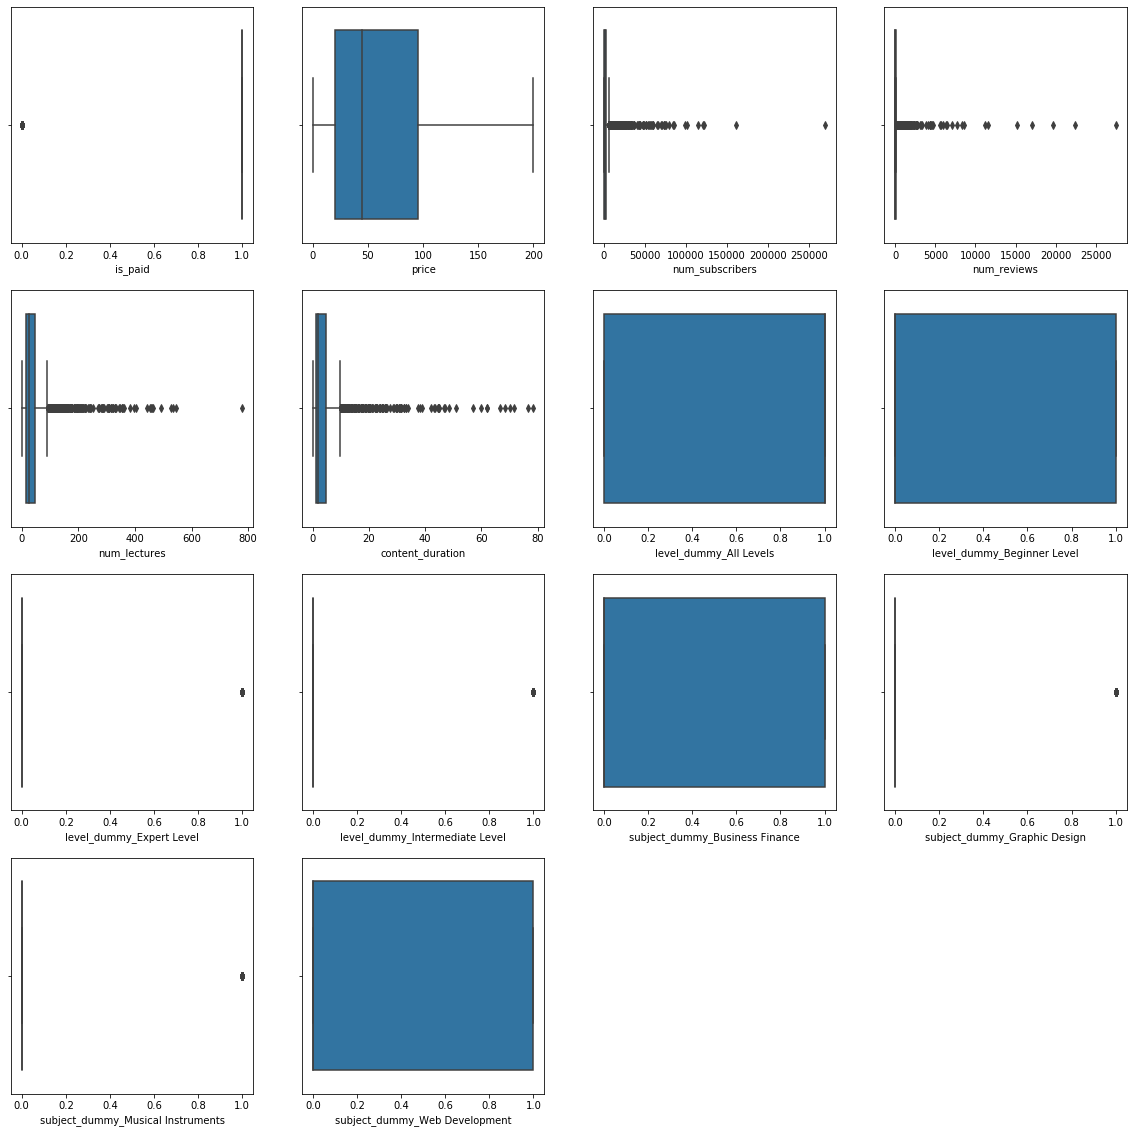

In [21]:
# cols = [
#  'is_paid',
#  'price',
#  'num_subscribers',
#  'num_reviews',
#  'num_lectures',
# #  'level',
#  'content_duration',
# #  'subject'
# ]
# list(cdata.columns)


a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in cdata.columns:
    plt.subplot(a, b, c)
    sns.boxplot(x=cdata[i])
    c += 1

plt.show()

Let's have a look at some boxplots with exeptions: 
- is_paid: Is binary so we can ignore.
- num_subscribers, num_reviews: As mentioned above it seems there is some "mega-successful" courses' they are defenitly exeptions, but in our particular reasearch we actually want to focus on those extraordinary successful courses!
- num_lectures, content_duration: There is defenitly some exeptional courses, we will check first the correlation of succesful courses to to the length of a course to determine if we want to keep it.
- level_dummy_Expert Level, level_dummy_Intermediate Level, subject_dummy_Graphic Design, subject_dummy_Musical Instruments: those are all atributes with less popularuty.  

In [119]:
corr = data.corr()
corr.style\
    .background_gradient(cmap='viridis', axis=None)\
    .set_precision(2)\
    .set_caption('Features Correlation Matrix')\

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,level_dummy_All Levels,level_dummy_Beginner Level,level_dummy_Expert Level,level_dummy_Intermediate Level,subject_dummy_Business Finance,subject_dummy_Graphic Design,subject_dummy_Musical Instruments,subject_dummy_Web Development
is_paid,1,0.33,-0.27,-0.087,0.11,0.094,0.08,-0.1,0.038,0.017,0.0099,0.042,0.029,-0.067
price,0.33,1,0.051,0.11,0.33,0.29,0.12,-0.12,0.052,-0.024,0.028,-0.06,-0.13,0.13
num_subscribers,-0.27,0.051,1,0.65,0.16,0.16,0.043,-0.00051,-0.031,-0.054,-0.12,-0.067,-0.098,0.25
num_reviews,-0.087,0.11,0.65,1,0.24,0.23,0.06,-0.042,-0.016,-0.024,-0.069,-0.045,-0.056,0.15
num_lectures,0.11,0.33,0.16,0.24,1,0.8,0.12,-0.1,-0.023,-0.03,-0.11,-0.071,-0.017,0.18
content_duration,0.094,0.29,0.16,0.23,0.8,1,0.13,-0.12,-0.025,-0.021,-0.062,-0.038,-0.098,0.17
level_dummy_All Levels,0.08,0.12,0.043,0.06,0.12,0.13,1,-0.76,-0.13,-0.38,0.081,-0.027,-0.11,0.034
level_dummy_Beginner Level,-0.1,-0.12,-0.00051,-0.042,-0.1,-0.12,-0.76,1,-0.092,-0.26,-0.089,0.054,0.09,-0.028
level_dummy_Expert Level,0.038,0.052,-0.031,-0.016,-0.023,-0.025,-0.13,-0.092,1,-0.046,0.057,-0.027,-0.021,-0.018
level_dummy_Intermediate Level,0.017,-0.024,-0.054,-0.024,-0.03,-0.021,-0.38,-0.26,-0.046,1,-0.016,-0.028,0.051,-0.0043


In [120]:
corr['num_subscribers'].sort_values(ascending=False)

num_subscribers                      1.000000
num_reviews                          0.649946
subject_dummy_Web Development        0.252886
content_duration                     0.161839
num_lectures                         0.157746
price                                0.050769
level_dummy_All Levels               0.042841
level_dummy_Beginner Level          -0.000514
level_dummy_Expert Level            -0.031058
level_dummy_Intermediate Level      -0.054279
subject_dummy_Graphic Design        -0.066826
subject_dummy_Musical Instruments   -0.097830
subject_dummy_Business Finance      -0.119242
is_paid                             -0.266159
Name: num_subscribers, dtype: float64

In [123]:
plt.scatter(data.num_subscribers, data.num_reviews, x='num_subscribers', y='num_reviews')

TypeError: scatter() got multiple values for argument 'x'

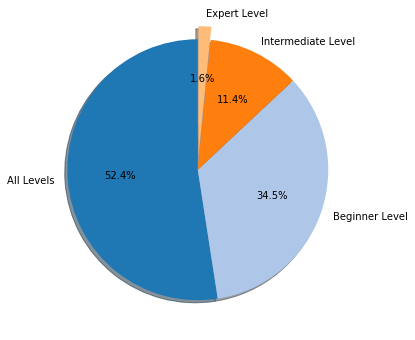

In [107]:
levels_dist = dict(data['level'].value_counts(normalize=True))

levels_labels = list(levels_dist.keys())
levels_values = list(levels_dist.values())
levels_explode = (0, 0, 0, 0.1)

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(levels_values, labels=levels_labels, 
        explode=levels_explode, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=plt.cm.tab20.colors)
plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

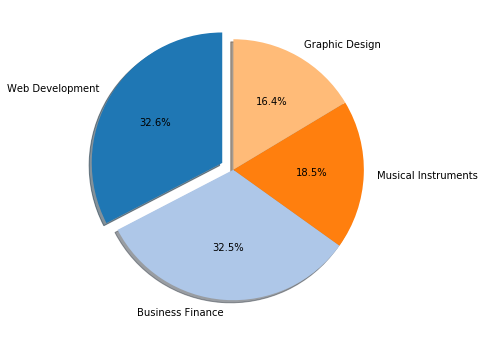

In [102]:
subjects_dist = dict(data['subject'].value_counts(normalize=True))

subjects_labels = list(subjects_dist.keys())
subjects_values = list(subjects_dist.values())
subject_explode = (0.1, 0, 0, 0)

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(subjects_values, labels=subjects_labels, 
        explode=subject_explode, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=plt.cm.tab20.colors)
plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")